# Cancer Classifier using K Nearest Neighbor

In this project, I will use a dataset containing information from patients relative to breast cancer, that predicts whether is malignant or not.


### Dataset

Data set is available at Sklearn Datasets.

### Features

Input and Output `features`:
* age: continuous
* workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
* education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool
* race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black
* sex: Female, Male
* capital-gain: continuous
* capital-loss: continuous
* hours-per-week: continuous
* native country: discrete
* income: discrete, >50K, <=50K

------

### EDA and Logistic Regression Assumptions
1. The dataset has been saved as a dataframe named `df`. The outcome variable here is `income`. Check if the dataset is `imbalanced`.
2. Notice we have created a variable named `feature_cols`. This contains a list of the variables we will use as our predictor variables.
    `Transform` the dataset of predictor variables to dummy variables and save this in a new DataFrame called `X`.
3. Using `X`, create a `heatmap` of the correlation values.
4. Determine if `scaling` is needed for `X` prior to modeling. Then create the `y` output variable which is binary, `0` when income is less than $50K, `1` when greater than $50K.

### Logistic Regression Models and Evaluation
5. Split the data into a training and testing set. Set the `random_state` to 1 and `test_size` to `.2`.
6. Print the model parameters (`intercept` and `coefficients`).
7. Evaluate the predictions of the model on the `test set`. Print the `confusion matrix` and `accuracy score`.
8. Create a new DataFrame of the model coefficients and variable names. Sort values based on coefficient and exclude any that are equal to zero. Print the values of the DataFrame.
9. Create a `barplot` of the coefficients sorted in ascending order.
10. Plot the `ROC curve` and print the `AUC value`.

In [71]:
# Explore the data

from sklearn.datasets import load_breast_cancer

breast_cancer_data = load_breast_cancer()

print(breast_cancer_data.data)

print(breast_cancer_data.target)
print(breast_cancer_data.target_names)

[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 

0 Corresponds to Malignat and 1 to Benign

In [72]:
# Splitting the data into Training and Validation Sets

from sklearn.model_selection import train_test_split

x = breast_cancer_data.data
y = breast_cancer_data.target

# Training and Test Set
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, test_size = 0.2, random_state=60)

print(len(x_train))
print(len(y_train))

455
455


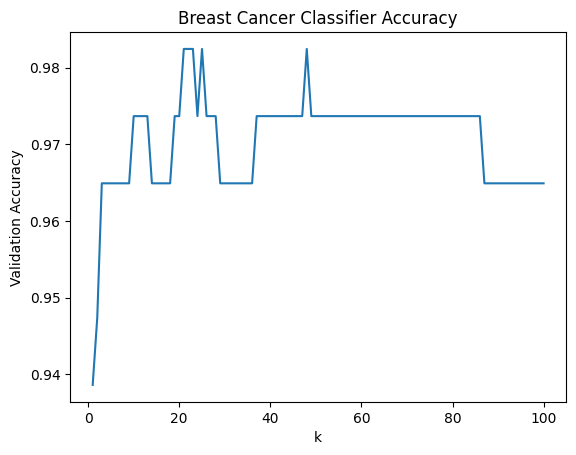

In [73]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

# Find best K
labels = range(1, 101)
accuracies = []
for i in range(100):
    classifier = KNeighborsClassifier(n_neighbors = i + 1)
    classifier.fit(x_train, y_train)
    accuracies.append(classifier.score(x_test, y_test))

plt.plot(labels, accuracies)
plt.title("Breast Cancer Classifier Accuracy")
plt.xlabel("k")
plt.ylabel("Validation Accuracy")
plt.show()

In [74]:
classifier = KNeighborsClassifier(n_neighbors = 23)
classifier.fit(x_train, y_train)

print(classifier.score(x_test, y_test))   

0.9824561403508771


In [75]:
print(breast_cancer_data.feature_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [90]:
for patient in range(len(breast_cancer_data.target)):
    if breast_cancer_data.target[patient] == 1:     # Malignant
        print("Index: {}".format(patient))
        print(breast_cancer_data.target[patient])

Index: 19
1
Index: 20
1
Index: 21
1
Index: 37
1
Index: 46
1
Index: 48
1
Index: 49
1
Index: 50
1
Index: 51
1
Index: 52
1
Index: 55
1
Index: 58
1
Index: 59
1
Index: 60
1
Index: 61
1
Index: 63
1
Index: 66
1
Index: 67
1
Index: 68
1
Index: 69
1
Index: 71
1
Index: 74
1
Index: 76
1
Index: 79
1
Index: 80
1
Index: 81
1
Index: 84
1
Index: 88
1
Index: 89
1
Index: 90
1
Index: 92
1
Index: 93
1
Index: 96
1
Index: 97
1
Index: 98
1
Index: 101
1
Index: 102
1
Index: 103
1
Index: 104
1
Index: 106
1
Index: 107
1
Index: 109
1
Index: 110
1
Index: 111
1
Index: 112
1
Index: 113
1
Index: 114
1
Index: 115
1
Index: 116
1
Index: 120
1
Index: 123
1
Index: 124
1
Index: 125
1
Index: 128
1
Index: 130
1
Index: 133
1
Index: 136
1
Index: 137
1
Index: 139
1
Index: 140
1
Index: 142
1
Index: 143
1
Index: 144
1
Index: 145
1
Index: 147
1
Index: 148
1
Index: 149
1
Index: 150
1
Index: 151
1
Index: 152
1
Index: 153
1
Index: 154
1
Index: 155
1
Index: 157
1
Index: 158
1
Index: 159
1
Index: 160
1
Index: 163
1
Index: 165
1
Index: 1

In [91]:
print(breast_cancer_data.data[19])
print(breast_cancer_data.data[20])
print(breast_cancer_data.data[37])

[1.354e+01 1.436e+01 8.746e+01 5.663e+02 9.779e-02 8.129e-02 6.664e-02
 4.781e-02 1.885e-01 5.766e-02 2.699e-01 7.886e-01 2.058e+00 2.356e+01
 8.462e-03 1.460e-02 2.387e-02 1.315e-02 1.980e-02 2.300e-03 1.511e+01
 1.926e+01 9.970e+01 7.112e+02 1.440e-01 1.773e-01 2.390e-01 1.288e-01
 2.977e-01 7.259e-02]
[1.308e+01 1.571e+01 8.563e+01 5.200e+02 1.075e-01 1.270e-01 4.568e-02
 3.110e-02 1.967e-01 6.811e-02 1.852e-01 7.477e-01 1.383e+00 1.467e+01
 4.097e-03 1.898e-02 1.698e-02 6.490e-03 1.678e-02 2.425e-03 1.450e+01
 2.049e+01 9.609e+01 6.305e+02 1.312e-01 2.776e-01 1.890e-01 7.283e-02
 3.184e-01 8.183e-02]
[1.303e+01 1.842e+01 8.261e+01 5.238e+02 8.983e-02 3.766e-02 2.562e-02
 2.923e-02 1.467e-01 5.863e-02 1.839e-01 2.342e+00 1.170e+00 1.416e+01
 4.352e-03 4.899e-03 1.343e-02 1.164e-02 2.671e-02 1.777e-03 1.330e+01
 2.281e+01 8.446e+01 5.459e+02 9.701e-02 4.619e-02 4.833e-02 5.013e-02
 1.987e-01 6.169e-02]


In [95]:
guess = classifier.predict([
    breast_cancer_data.data[0],
    breast_cancer_data.data[19],
    breast_cancer_data.data[37]]
) 
print(guess)

[0 1 1]
